In [200]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import helper as hp
from statsmodels.regression import linear_model
import scipy.stats as stats

plt.style.use('ggplot')

In [208]:
pathways = {'Denver, CO': ('~/Desktop/capstone/data/Denver_1940_2010.csv', ''),
            'Granby, CO': ('~/Desktop/capstone/data/Granby.csv', 'GRAND LAKE 1 NW, CO US'),
            'Salida, CO': ('~/Desktop/capstone/data/Durango.csv', 'BUENA VISTA 2 S, CO US'),
            'Steamboat, CO': ('~/Desktop/capstone/data/Steamboat.csv','STEAMBOAT SPRINGS, CO US')}

In [241]:
pathways = {'Denver, CO': ('~/Desktop/capstone/data/Denver_1940_2010.csv', ''),
            'Seattle, WA': ('~/Desktop/capstone/data/Seattle_1898_.csv', 'SEATTLE TACOMA AIRPORT, WA US'),
#            'North Bend, WA': ('~/Desktop/capstone/data/Seattle_1898_.csv', 'CEDAR LAKE, WA US'),
            'Boston, MA': ('~/Desktop/capstone/data/Boston_1936_corr.csv', ''),
#             'JP': ('~/Desktop/capstone/data/JP.csv', ''),
            'Baton Rouge, LA': ('~/Desktop/capstone/data/Baton_Rouge.csv','')}

In [242]:
####  Load all
start_date = datetime(1950,1,1)
end_date = datetime(2019,12,31)
Location = dict()
for name, path in pathways.items():
    Location[name] = hp.GHCN_Loc(*path)
    Location[name].set_range(start_date, end_date)
    Location[name].process()
    Location[name].create_aggregate_df()

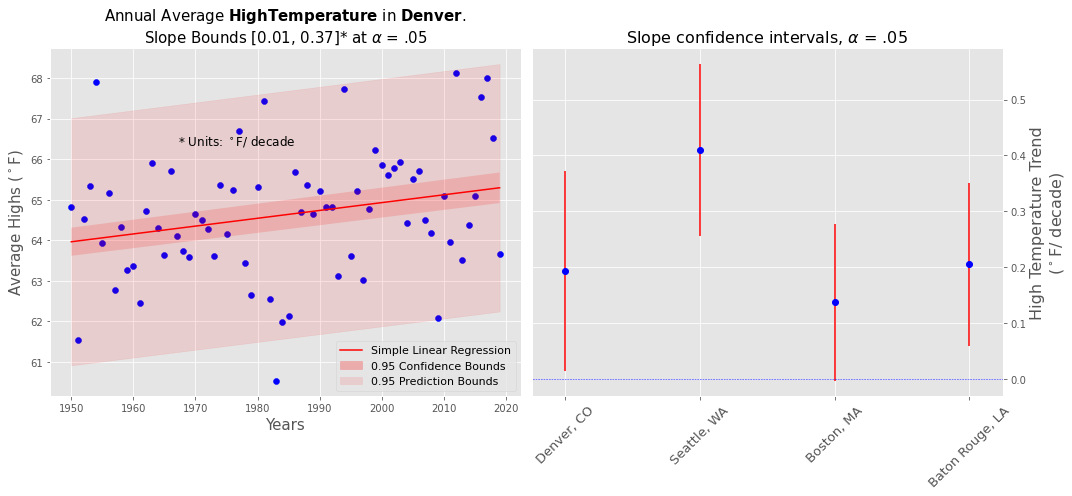

In [243]:
fig, axs = plt.subplots(1,2, figsize=(15,7))

Loc = Location['Denver, CO']
CI = Loc.stats(axs[0], 'TMAX_avg', 0.05)

axs[0].legend(fontsize=11, loc='lower right')
leg = axs[0].get_legend()
leg.legendHandles[1].set_color([1, 0, 0, 0.25])

axs[0].set_ylabel(hp.ylabel_dict['TMAX_avg'], fontsize = 15)
axs[0].set_xlabel('Years', fontsize = 15)
title_text = r"Slope Bounds [{:.2f}, {:.2f}]* at $\alpha$ = .05".format(CI[0]*10, CI[1]*10)
axs[0].set_title(r"""Annual Average ${\bfHigh Temperature}$ in ${\bfDenver}$.
"""             + title_text, fontsize = 15)
axs[0].text(0.37, 1.45, r'* Units: $^\circ$F/ decade', transform=ax.transAxes, fontsize=12)

plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);


#### Get Confidence Intervals
CI_dict = dict()
agg_name = 'TMAX_avg'

for key, data_obj in Location.items():
        CI_dict[key] = data_obj.stats(0, agg_name, 0.05, False)

X = list(range(1,2*len(CI_dict),2))
X_labels = []
Y_mean = []
Y_error = []
for name, CI in CI_dict.items():
    X_labels.append(name)
    Y_mean.append(CI.mean()*10)
    Y_error.append((CI.mean()-CI[0])*10)

axs[1].errorbar(X, Y_mean, yerr=Y_error, fmt = 'o', color = 'b', ecolor='r')
plt.xticks(X, X_labels)
axs[1].set_ylabel(r'''High Temperature Trend
($^\circ$F/ decade)''', fontsize = 16)
axs[1].set_title(r'''Slope confidence intervals, $\alpha$ = .05''', fontsize = 16)

axs[1].plot([0,10], [0,0], 'b--', linewidth=0.5)
plt.xticks(fontsize = 13, rotation=45);
plt.yticks(fontsize = 12);
plt.xlim([0.5,max(X)+0.5]);
# plt.grid(False)
plt.tight_layout()
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()

plt.tight_layout()
plt.savefig('Denver_TMAX_annual_both.png', edgecolor = 'b')

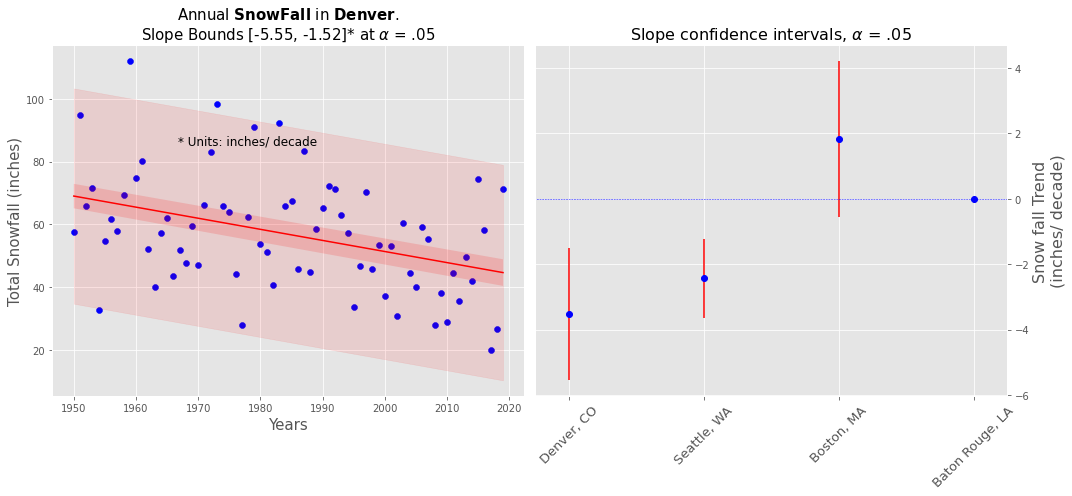

In [244]:
fig, axs = plt.subplots(1,2, figsize=(15,7))

Loc = Location['Denver, CO']
CI = Loc.stats(axs[0], 'SNOW_sum', 0.05)

# axs[0].legend(fontsize=11, loc='lower right')
# leg = axs[0].get_legend()
# leg.legendHandles[1].set_color([1, 0, 0, 0.25])

axs[0].set_ylabel(hp.ylabel_dict['SNOW_sum'], fontsize = 15)
axs[0].set_xlabel('Years', fontsize = 15)
title_text = r"Slope Bounds [{:.2f}, {:.2f}]* at $\alpha$ = .05".format(CI[0]*10, CI[1]*10)
axs[0].set_title(r"""Annual ${\bfSnow Fall}$ in ${\bfDenver}$.
"""             + title_text, fontsize = 15)
axs[0].text(0.37, 1.45, r'* Units: inches/ decade', transform=ax.transAxes, fontsize=12)

plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);


#### Get Confidence Intervals
CI_dict = dict()
agg_name = 'SNOW_sum'

for key, data_obj in Location.items():
        CI_dict[key] = data_obj.stats(0, agg_name, 0.05, False)

X = list(range(1,2*len(CI_dict),2))
X_labels = []
Y_mean = []
Y_error = []
for name, CI in CI_dict.items():
    X_labels.append(name)
    Y_mean.append(CI.mean()*10)
    Y_error.append((CI.mean()-CI[0])*10)

axs[1].errorbar(X, Y_mean, yerr=Y_error, fmt = 'o', color = 'b', ecolor='r')
plt.xticks(X, X_labels)
axs[1].set_ylabel(r'''Snow fall Trend
(inches/ decade)''', fontsize = 16)
axs[1].set_title(r'''Slope confidence intervals, $\alpha$ = .05''', fontsize = 16)

axs[1].plot([0,10], [0,0], 'b--', linewidth=0.5)
plt.xticks(fontsize = 13, rotation=45);
plt.yticks(fontsize = 12);
plt.xlim([0.5,max(X)+0.5]);
plt.tight_layout()
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()

plt.tight_layout()
plt.savefig('Denver_SNOW_annual_both.png', edgecolor = 'b')

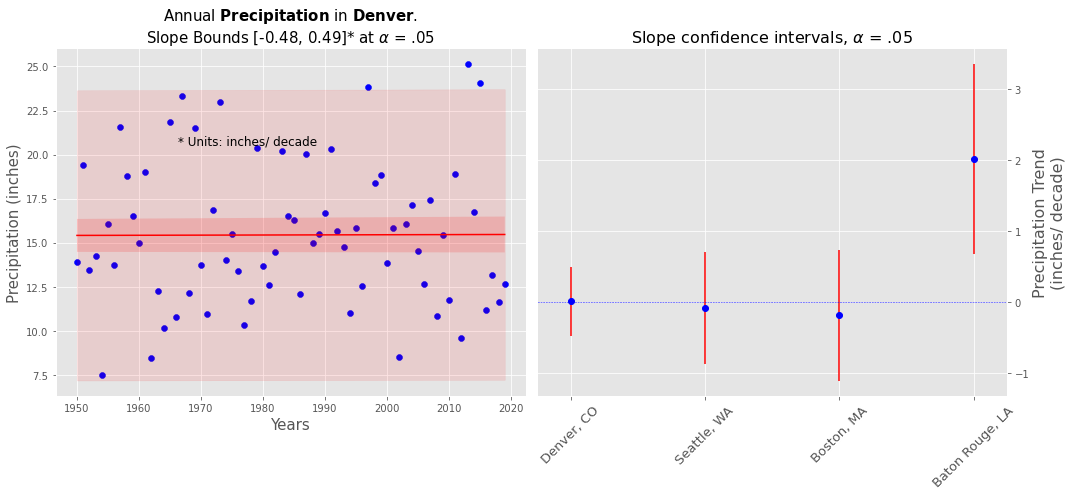

In [245]:
fig, axs = plt.subplots(1,2, figsize=(15,7))

Loc = Location['Denver, CO']
CI = Loc.stats(axs[0], 'PRCP_sum', 0.05)

axs[0].set_ylabel(hp.ylabel_dict['PRCP_sum'], fontsize = 15)
axs[0].set_xlabel('Years', fontsize = 15)
title_text = r"Slope Bounds [{:.2f}, {:.2f}]* at $\alpha$ = .05".format(CI[0]*10, CI[1]*10)
axs[0].set_title(r"""Annual ${\bfPrecipitation}$ in ${\bfDenver}$.
"""             + title_text, fontsize = 15)
axs[0].text(0.37, 1.45, r'* Units: inches/ decade', transform=ax.transAxes, fontsize=12)

plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);


#### Get Confidence Intervals
CI_dict = dict()
agg_name = 'PRCP_sum'

for key, data_obj in Location.items():
        CI_dict[key] = data_obj.stats(0, agg_name, 0.05, False)

X = list(range(1,2*len(CI_dict),2))
X_labels = []
Y_mean = []
Y_error = []
for name, CI in CI_dict.items():
    X_labels.append(name)
    Y_mean.append(CI.mean()*10)
    Y_error.append((CI.mean()-CI[0])*10)

axs[1].errorbar(X, Y_mean, yerr=Y_error, fmt = 'o', color = 'b', ecolor='r')
plt.xticks(X, X_labels)
axs[1].set_ylabel(r'''Precipitation Trend
(inches/ decade)''', fontsize = 16)
axs[1].set_title(r'''Slope confidence intervals, $\alpha$ = .05''', fontsize = 16)

axs[1].plot([0,10], [0,0], 'b--', linewidth=0.5)
plt.xticks(fontsize = 13, rotation=45);
plt.yticks(fontsize = 12);
plt.xlim([0.5,max(X)+0.5]);
plt.tight_layout()
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()

plt.tight_layout()
plt.savefig('Denver_PRCP_annual_both.png', edgecolor = 'b')

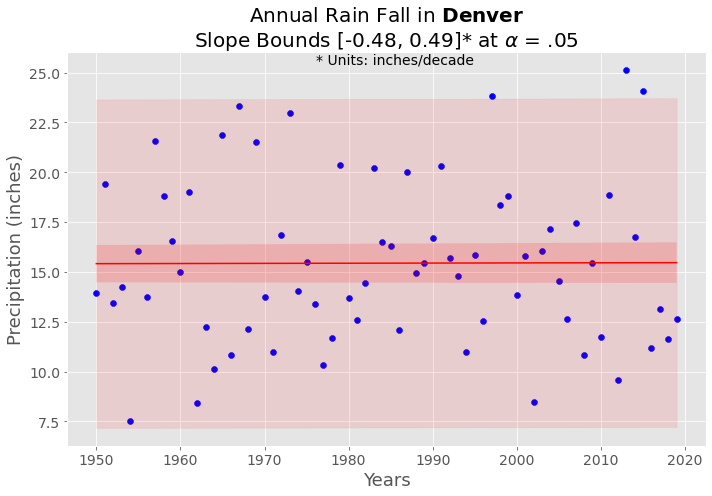

In [151]:
fig, ax = plt.subplots(1, figsize=(10,7))  #[12, 14, 14, 20, 20, 15, 15]

Loc = Location['Denver, CO']
CI = Loc.stats(ax, 'PRCP_sum', 0.05)

# ax.legend(fontsize=15)
# leg = ax.get_legend()
# leg.legendHandles[1].set_color([1, 0, 0, 0.25])

ax.set_ylabel(hp.ylabel_dict['PRCP_sum'], fontsize = 18)
ax.set_xlabel('Years', fontsize = 18)
title_text = r"Slope Bounds [{:.2f}, {:.2f}]* at $\alpha$ = .05".format(CI[0]*10, CI[1]*10)
ax.set_title(r"""Annual Rain Fall in ${\bfDenver}$
"""             + title_text, fontsize = 20)
ax.text(0.39, 0.97, '* Units: inches/decade', transform=ax.transAxes, fontsize=14)

plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);
plt.tight_layout()
plt.savefig('Denver_PRCP_annual.png', edgecolor = 'b')

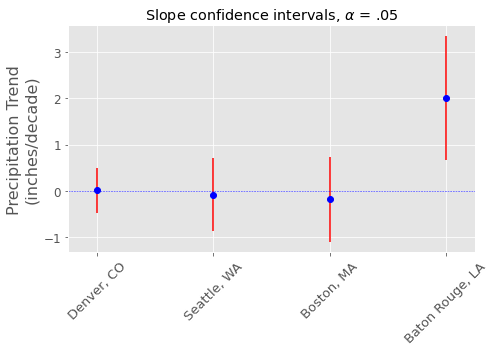

In [120]:
#### Get Confidence Intervals
CI_dict = dict()
agg_name = 'PRCP_sum'

for key, data_obj in Location.items():
        CI_dict[key] = data_obj.stats(0, agg_name, 0.05, False)

fig, ax = plt.subplots(1, figsize=(7,5))
X = list(range(1,2*len(CI_dict),2))
X_labels = []
Y_mean = []
Y_error = []
for name, CI in CI_dict.items():
    X_labels.append(name)
    Y_mean.append(CI.mean()*10)
    Y_error.append((CI.mean()-CI[0])*10)

ax.errorbar(X, Y_mean, yerr=Y_error, fmt = 'o', color = 'b', ecolor='r')
plt.xticks(X, X_labels)
ax.set_ylabel('''Precipitation Trend
(inches/decade)''', fontsize = 16)
ax.set_title(r'''Slope confidence intervals, $\alpha$ = .05''')

ax.plot([0,10], [0,0], 'b--', linewidth=0.5)
plt.xticks(fontsize = 13, rotation=45);
plt.yticks(fontsize = 12);
plt.xlim([0.5,max(X)+0.5]);
plt.tight_layout()
plt.savefig('Denver_PRCP_annual_CI.png', edgecolor = 'b')

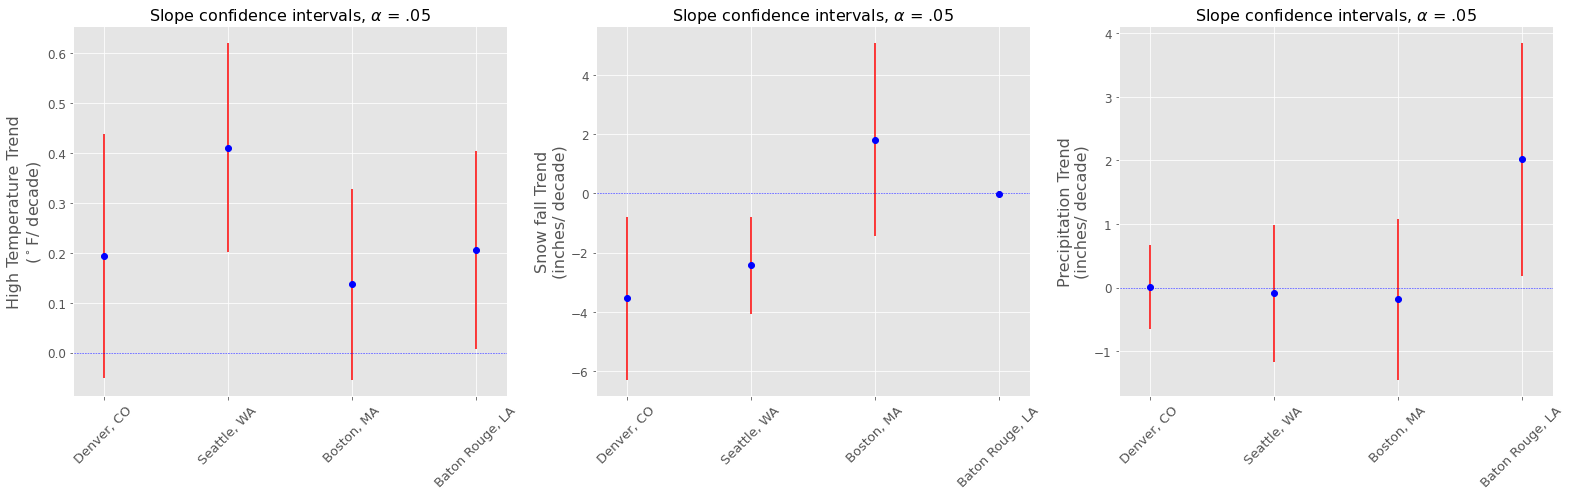

In [246]:
fig, axs = plt.subplots(1,3,figsize=(22,7))
alpha = 0.05/6          # Bonferroni Correction for 6 pairwise tests


#### Get Confidence Intervals
CI_dict = dict()
agg_name = 'TMAX_avg'

for key, data_obj in Location.items():
        CI_dict[key] = data_obj.stats(0, agg_name, alpha, False)

X = list(range(1,2*len(CI_dict),2))
X_labels = []
Y_mean = []
Y_error = []
for name, CI in CI_dict.items():
    X_labels.append(name)
    Y_mean.append(CI.mean()*10)
    Y_error.append((CI.mean()-CI[0])*10)

axs[0].errorbar(X, Y_mean, yerr=Y_error, fmt = 'o', color = 'b', ecolor='r')

axs[0].set_ylabel(r'''High Temperature Trend
($^\circ$F/ decade)''', fontsize = 16)
axs[0].set_title(r'''Slope confidence intervals, $\alpha$ = .05''', fontsize = 16)

axs[0].plot([0,10], [0,0], 'b--', linewidth=0.5)
plt.sca(axs[0])
plt.xticks(X, X_labels, fontsize = 13, rotation=45)
plt.yticks(fontsize = 12);
plt.xlim([0.5,max(X)+0.5]);




#### Get Confidence Intervals
CI_dict = dict()
agg_name = 'SNOW_sum'

for key, data_obj in Location.items():
        CI_dict[key] = data_obj.stats(0, agg_name, alpha, False)

X = list(range(1,2*len(CI_dict),2))
X_labels = []
Y_mean = []
Y_error = []
for name, CI in CI_dict.items():
    X_labels.append(name)
    Y_mean.append(CI.mean()*10)
    Y_error.append((CI.mean()-CI[0])*10)

axs[1].errorbar(X, Y_mean, yerr=Y_error, fmt = 'o', color = 'b', ecolor='r')
axs[1].set_ylabel(r'''Snow fall Trend
(inches/ decade)''', fontsize = 16)
axs[1].set_title(r'''Slope confidence intervals, $\alpha$ = .05''', fontsize = 16)

axs[1].plot([0,10], [0,0], 'b--', linewidth=0.5)
plt.sca(axs[1])
plt.xticks(X, X_labels, fontsize = 13, rotation=45)
plt.yticks(fontsize = 12);
plt.xlim([0.5,max(X)+0.5]);




#### Get Confidence Intervals
CI_dict = dict()
agg_name = 'PRCP_sum'

for key, data_obj in Location.items():
        CI_dict[key] = data_obj.stats(0, agg_name, alpha, False)

X = list(range(1,2*len(CI_dict),2))
X_labels = []
Y_mean = []
Y_error = []
for name, CI in CI_dict.items():
    X_labels.append(name)
    Y_mean.append(CI.mean()*10)
    Y_error.append((CI.mean()-CI[0])*10)

axs[2].errorbar(X, Y_mean, yerr=Y_error, fmt = 'o', color = 'b', ecolor='r')
axs[2].set_ylabel(r'''Precipitation Trend
(inches/ decade)''', fontsize = 16)
axs[2].set_title(r'''Slope confidence intervals, $\alpha$ = .05''', fontsize = 16)

axs[2].plot([0,10], [0,0], 'b--', linewidth=0.5)
plt.sca(axs[2])
plt.xticks(X, X_labels, fontsize = 13, rotation=45)
plt.yticks(fontsize = 12);
plt.xlim([0.5,max(X)+0.5]);
plt.tight_layout()

plt.savefig('US_intervals_bonferroni.png')
